In [1]:
import json

def get_values(json_file_path):
  with open(json_file_path, 'r') as json_file:
      data = json.load(json_file)

  data = data['UsersData']
  first_key = list(data.keys())[0]
  data = data[first_key]
  data = data['readings']

  distance1 = []
  distance2 = []
  voltage0 = []
  voltage1 = []
  voltage2 = []
  Accangle_x = []
  Accangle_y = []
  Acceleration_x = []
  Acceleration_y = []
  Acceleration_z = []

  for key, value in data.items():
    distance1.append(float(value['distance1']))
    distance2.append(float(value['distance2']))
    voltage0.append(float(value['voltage0']))
    voltage1.append(float(value['voltage1']))
    voltage2.append(float(value['voltage2']))
    Accangle_x.append((float(value['Accangle1']['x'])+float(value['Accangle2']['x']))/2)
    Accangle_y.append((float(value['Accangle1']['y'])+float(value['Accangle2']['y']))/2)
    Acceleration_x.append((float(value['Acceleration1']['x'])+float(value['Acceleration2']['x']))/2)
    Acceleration_y.append((float(value['Acceleration1']['y'])+float(value['Acceleration2']['y']))/2)
    Acceleration_z.append((float(value['Acceleration1']['z'])+float(value['Acceleration2']['z']))/2)

  return {'distance1':distance1,'distance2':distance2,'voltage0':voltage0,'voltage1':voltage1,'voltage2':voltage2, 'Accangle_x':Accangle_x, 'Accangle_y':Accangle_y, 'Acceleration_x':Acceleration_x,  'Acceleration_y':Acceleration_y, 'Acceleration_z':Acceleration_z}


In [2]:
normal = get_values('s3l_normal.json')
circum = get_values('s3l_circum.json')
gm = get_values('s3l_gm.json')
limping = get_values('s3l_limping.json')
parkinsons = get_values('s3l_parkinsons.json')
scissoring = get_values('s3l_scissoring.json')

In [3]:
import matplotlib.pyplot as plt

def plot(parameter):
  colors = ['r', 'g', 'b', 'c', 'm', 'y']
  labels = ['normal', 'circum', 'gm', 'limping', 'parkinsons', 'scissoring']

  plt.figure(figsize=(15, 8))

  plt.plot(normal[parameter], color=colors[0], label=labels[0])
  plt.plot(circum[parameter], color=colors[1], label=labels[1])
  plt.plot(gm[parameter], color=colors[2], label=labels[2])
  plt.plot(limping[parameter], color=colors[3], label=labels[3])
  plt.plot(parkinsons[parameter], color=colors[4], label=labels[4])
  plt.plot(scissoring[parameter], color=colors[5], label=labels[5])

  plt.xlabel('time')
  plt.ylabel(parameter)
  plt.title(parameter+' vs time')
  plt.legend()

  plt.show()

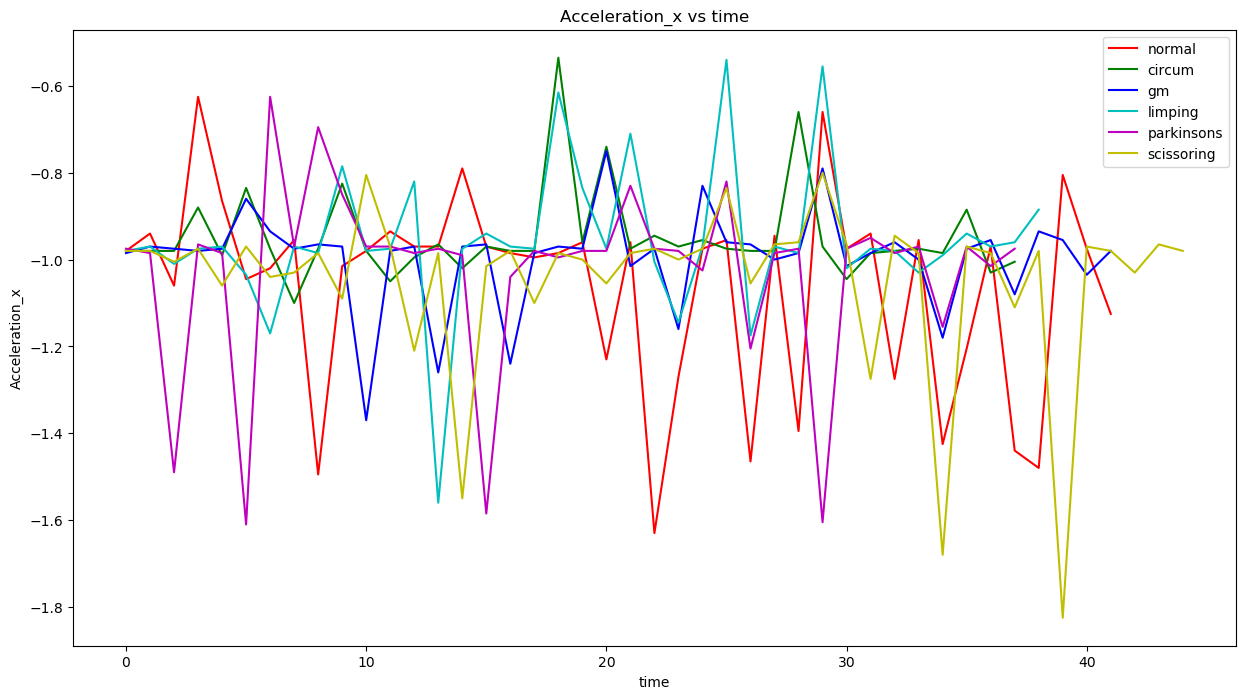

In [4]:
plot('Acceleration_x')

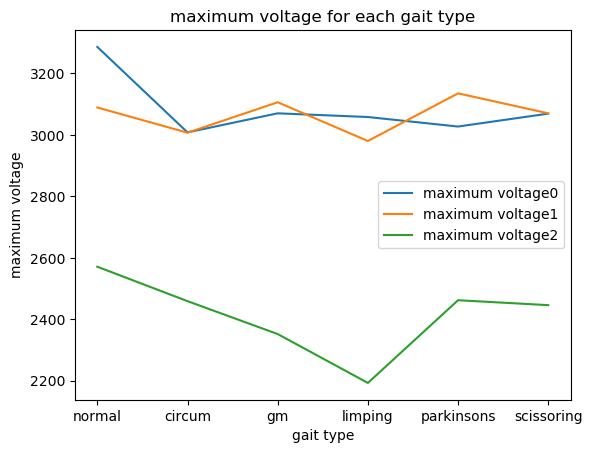

In [5]:
max_v0 = []
max_v1 = []
max_v2 = []
labels = ['normal', 'circum', 'gm', 'limping', 'parkinsons', 'scissoring']

max_v0.append(max(normal['voltage0']))
max_v0.append(max(circum['voltage0']))
max_v0.append(max(gm['voltage0']))
max_v0.append(max(limping['voltage0']))
max_v0.append(max(parkinsons['voltage0']))
max_v0.append(max(scissoring['voltage0']))

max_v1.append(max(normal['voltage1']))
max_v1.append(max(circum['voltage1']))
max_v1.append(max(gm['voltage1']))
max_v1.append(max(limping['voltage1']))
max_v1.append(max(parkinsons['voltage1']))
max_v1.append(max(scissoring['voltage1']))

max_v2.append(max(normal['voltage2']))
max_v2.append(max(circum['voltage2']))
max_v2.append(max(gm['voltage2']))
max_v2.append(max(limping['voltage2']))
max_v2.append(max(parkinsons['voltage2']))
max_v2.append(max(scissoring['voltage2']))

plt.plot(labels,max_v0,label='maximum voltage0')
plt.plot(labels,max_v1,label='maximum voltage1')
plt.plot(labels,max_v2,label='maximum voltage2')

plt.xlabel('gait type')
plt.ylabel('maximum voltage')
plt.title('maximum voltage for each gait type')
plt.legend()

plt.show()